<a href="https://colab.research.google.com/github/mokranerachedi/loan-approval-prediction/blob/main/loan_approval_prediction_FR_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prédiction des approbations de prêts**

Prédiction des approbations de prêt à l'aide de l'apprentissage automatique.

## **Importer les packages**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Charger les données**

In [43]:
df = pd.read_csv('/content/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Analyse Exploratoire des Données (EDA)**

### **Analyse de forme**

In [44]:
# La forme du dataframe
print(df.shape)
print("Le nombre de lignes :", df.shape[0])
print("Le nombre de colonnes :", df.shape[1])

(614, 13)
Le nombre de lignes : 614
Le nombre de colonnes : 13


In [45]:
# Liste des colonnes
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
# Informations sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
# Les types de données
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [48]:
# Descriptif statistique des données
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
# Le nombre de valeurs manquantes de chaque variable du dataframe
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [50]:
# Le nombre total de valeurs manquantes
print("Le nombre total de variables manquantes est de", (df.isna().sum()).sum())

Le nombre total de variables manquantes est de 149


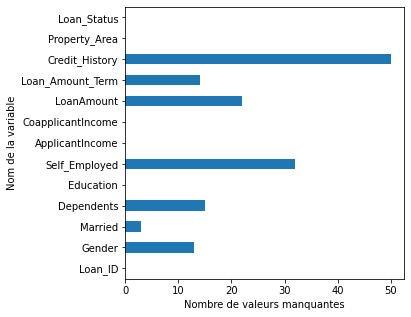

In [51]:
# Visualiser les valeurs manquantes
plt.figure(figsize=(5, 5))
df.isna().sum().plot(kind="barh")
plt.ylabel("Nom de la variable")
plt.xlabel("Nombre de valeurs manquantes")
plt.show()

### **Analyse de fond**

In [52]:
# Analyse de la variable cible 'Loan_Status'
# Note : normalize = True -> Pour avoir les résultats en pourcentage 
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

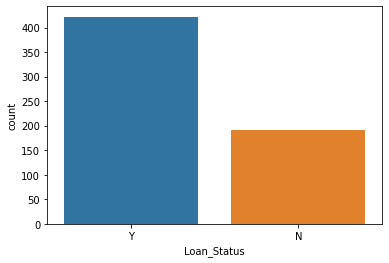

In [53]:
# Visualisation de la variable target 'Loan_Status' avec un diagramme à barres
sns.countplot(x = 'Loan_Status', data = df)
plt.show()

**Analyse de la variable cible :** 
- **68.73%** des demandes de prêt ont été accordées
- **31.27%** des demandes de prêt ont été refusées

In [54]:
# Analyse des variables catégorielles nominales

# Gender
print("# Gender")
print(df['Gender'].value_counts(normalize=True)*100)
print("-"*35)

# Married
print("# Married")
print(df['Married'].value_counts(normalize=True)*100)
print("-"*35)

# Education
print("# Education")
print(df['Education'].value_counts(normalize=True)*100)
print("-"*35)

# Self_Employed
print("# Self_Employed")
print(df['Self_Employed'].value_counts(normalize=True)*100)
print("-"*35)

# Gender
Male      81.364393
Female    18.635607
Name: Gender, dtype: float64
-----------------------------------
# Married
Yes    65.139116
No     34.860884
Name: Married, dtype: float64
-----------------------------------
# Education
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64
-----------------------------------
# Self_Employed
No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64
-----------------------------------


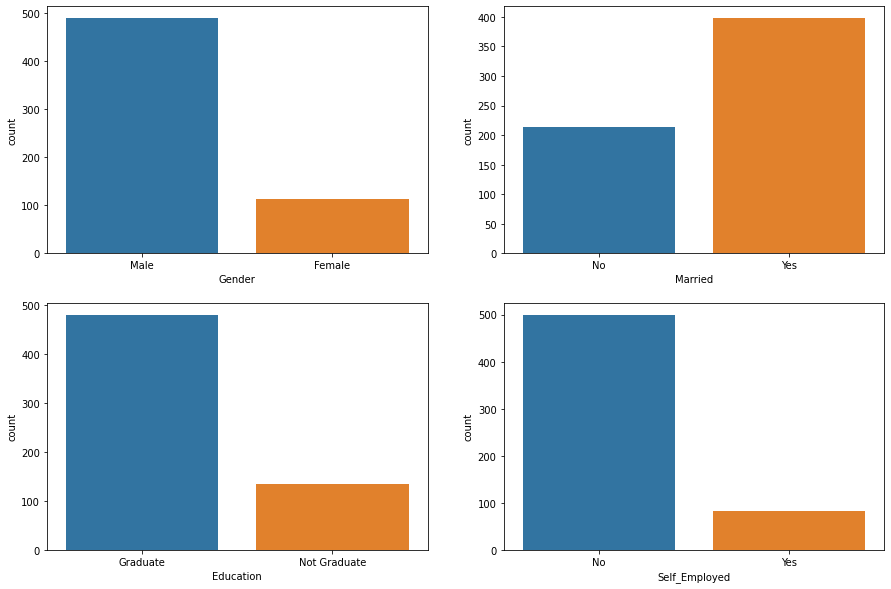

In [55]:
# Analyse des variables catégorielle nominales à l'aide des diagrammes à barres

plt.figure(figsize=(15, 10))

# Gender 
plt.subplot(2, 2, 1)
sns.countplot(x = 'Gender', data = df)

# Married
plt.subplot(2, 2, 2)
sns.countplot(x = 'Married', data = df)

# Education
plt.subplot(2, 2, 3)
sns.countplot(x = 'Education', data = df) 

# Self_Employed
plt.subplot(2, 2, 4)
sns.countplot(x = 'Self_Employed', data = df)

# On affiche les graphiques
plt.show()

**Analyse des variables catégorielles nominales :** 
- La majorité des demandeurs de crédits sont des hommes (plus de 81%).
- La plupart des demandeurs de crédits sont mariés (plus de 65%).
- Plus de 78% des demandeurs de crédits sont diplomés.
- Seulement 14% des demandeurs de crédits travaillent à leurs propres compte.

In [56]:
# Analyse des variables catégorielles ordinales

# Dependents
print("# Dependents")
print(df['Dependents'].value_counts(normalize=True)*100)
print("-"*35)

# Self_Employed
print("# Property_Area")
print(df['Property_Area'].value_counts(normalize=True)*100)
print("-"*35)

# Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64
-----------------------------------
# Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64
-----------------------------------


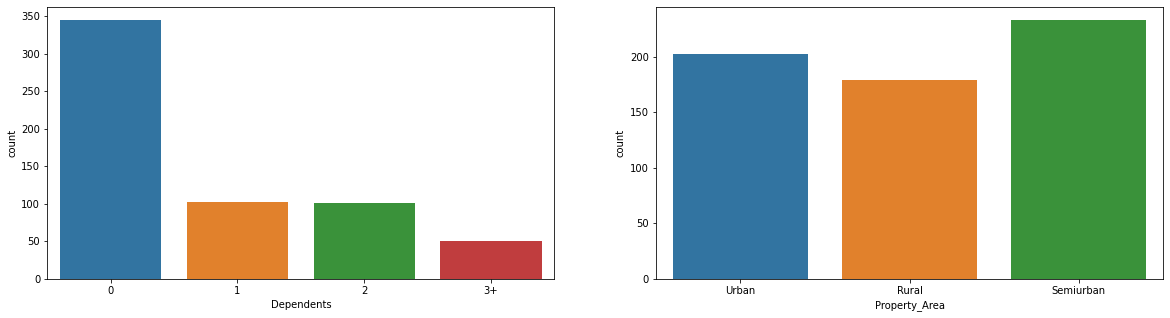

In [57]:
# Analyse des variables ordinales catégorielles à l'aide des diagrammes à barres

plt.figure(figsize=(20, 5))

# Dependents 
plt.subplot(1, 2, 1)
sns.countplot(x = 'Dependents', data = df)

# Property_Area
plt.subplot(1, 2, 2)
sns.countplot(x = 'Property_Area', data = df)

# On affiche les graphiques
plt.show()

**Analyse des variables catégorielles ordinales :** 

- La majorité des demandeurs de crédits n'ont pas de personnes à charge (plus de 57%).
- La zone **semi-urbaine** est la zone qui contient le plus de demandeurs de crédits.

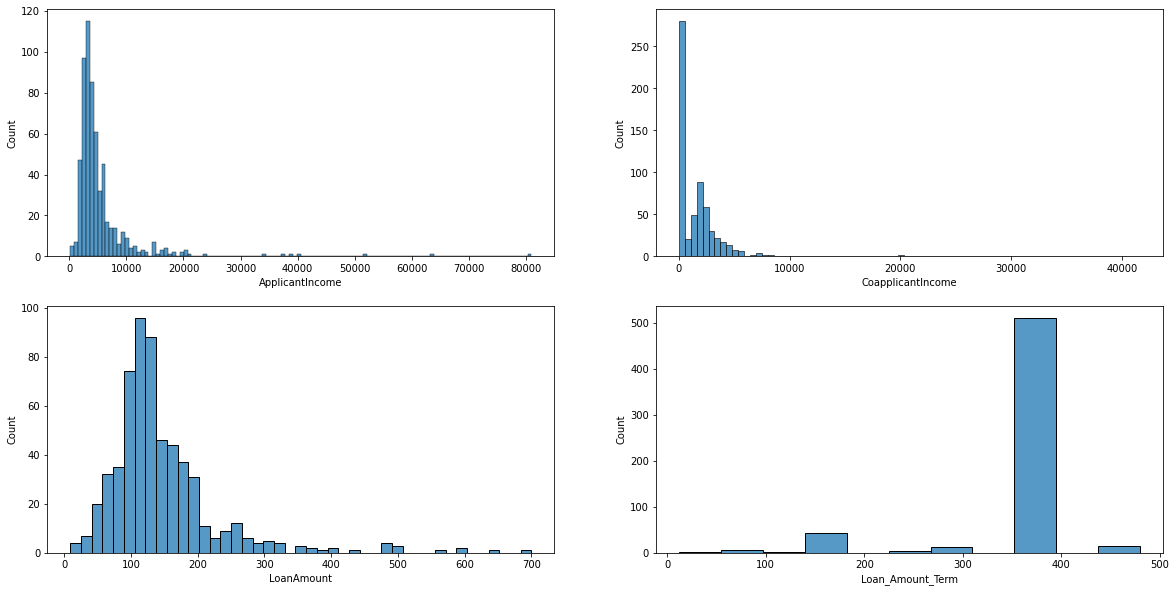

In [58]:
# Analyse des variables numériques

# Analyse des variables numériques avec des histogrammes
plt.figure(figsize=(20, 10))

# ApplicantIncome
plt.subplot(2, 2, 1)
sns.histplot(x = 'ApplicantIncome', data = df)

# CoapplicantIncome
plt.subplot(2, 2, 2)
sns.histplot(x = 'CoapplicantIncome', data = df)

# LoanAmount
plt.subplot(2, 2, 3)
sns.histplot(x ='LoanAmount', data = df)

# Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.histplot(x ='Loan_Amount_Term', data = df)

# On affiche les graphiques
plt.show()

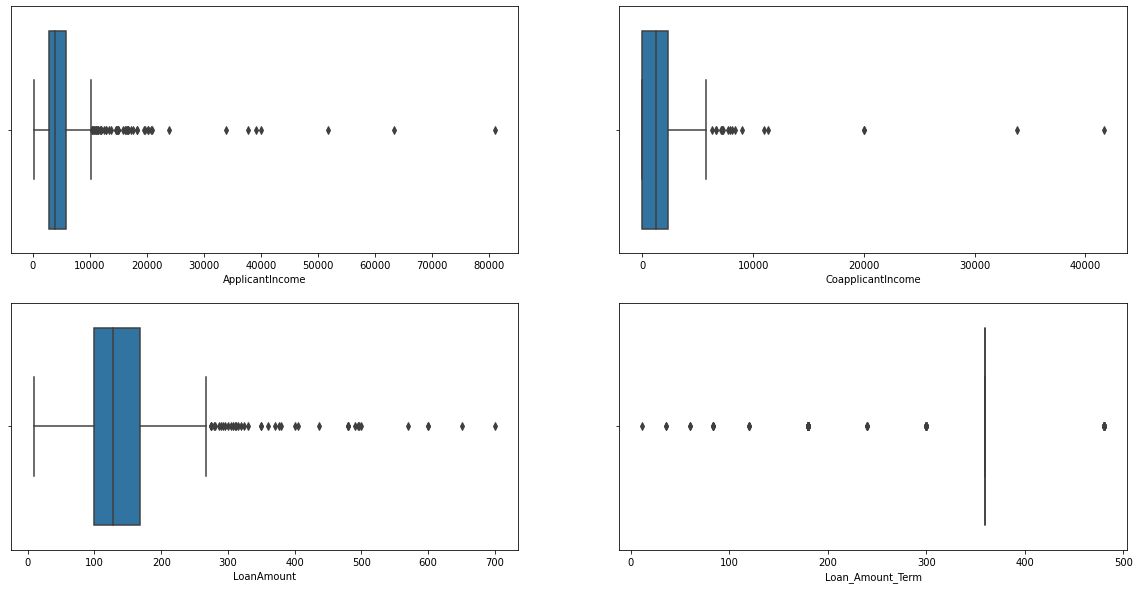

In [59]:
# Analyse des variables numériques avec des diagramme en boite

plt.figure(figsize=(20, 10))

# ApplicantIncome
plt.subplot(2, 2, 1)
sns.boxplot(x = 'ApplicantIncome', data = df)

# CoapplicantIncome
plt.subplot(2, 2, 2)
sns.boxplot(x = 'CoapplicantIncome', data = df)

# LoanAmount
plt.subplot(2, 2, 3)
sns.boxplot(x ='LoanAmount', data = df)

# Loan_Amount_Term
plt.subplot(2, 2, 4)
sns.boxplot(x ='Loan_Amount_Term', data = df)

# On affiche les graphiques
plt.show()

**Analyse des variables numériques :**

- Le revenue des demandeurs varie géneralement entre 0 et 10000.
- Le montant de crédits demandée se situe beaucoup plus entre 0 et 200.
- On remarque que les variables **ApplicantIncome**, **CoapplicantIncome** et **LoanAmount** contient des valeurs aberrantes (outliers).

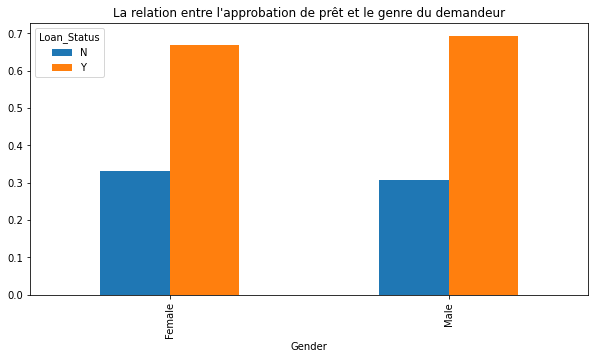

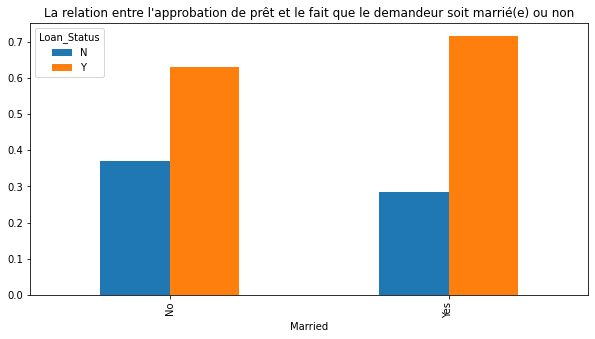

In [60]:
# Relations entre les variables indépendantes et la variable cible

# Gendre / Loan_Status
Gender=pd.crosstab(df['Gender'], df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de prêt et le genre du demandeur") 
plt.show()

# Married / Loan_Status
Married=pd.crosstab(df['Married'], df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de prêt et le fait que le demandeur soit marrié(e) ou non") 
plt.show()

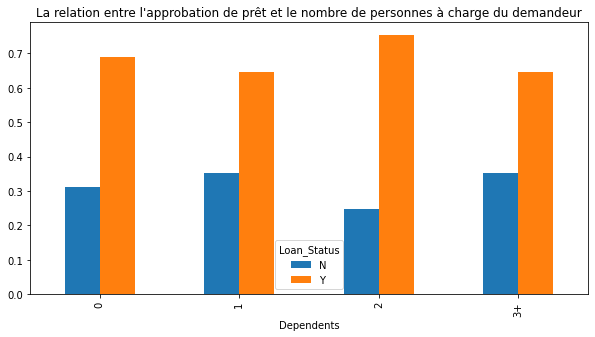

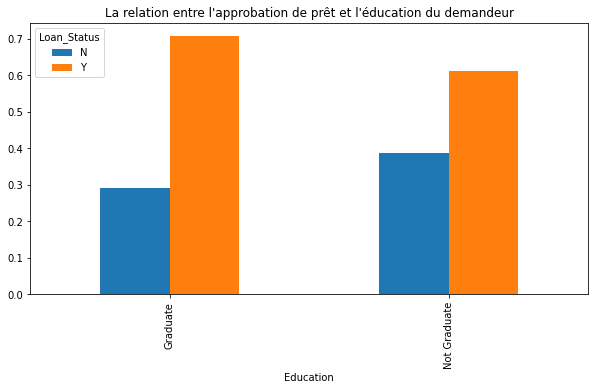

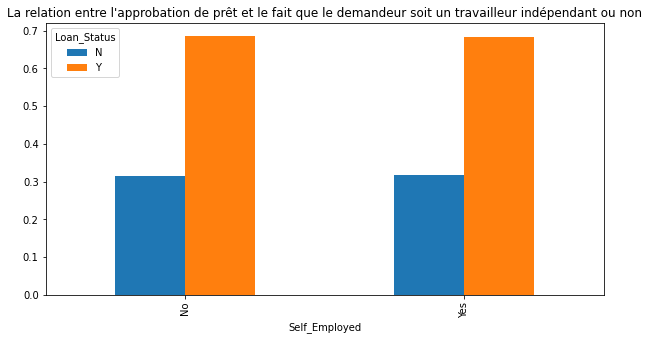

In [61]:
# Dependents / Loan_Status
Dependents=pd.crosstab(df['Dependents'], df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de prêt et le nombre de personnes à charge du demandeur") 
plt.show()

# Education / Loan_Status
Education=pd.crosstab(df['Education'], df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de prêt et l'éducation du demandeur") 
plt.show()

# Self_Employed / Loan_Status
Self_Employed=pd.crosstab(df['Self_Employed'], df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,5), title="La relation entre l'approbation de prêt et le fait que le demandeur soit un travailleur indépendant ou non") 
plt.show()

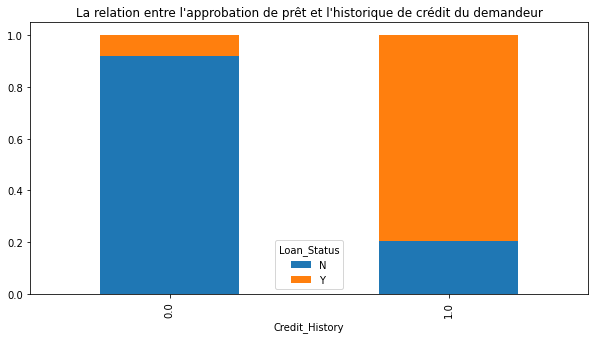

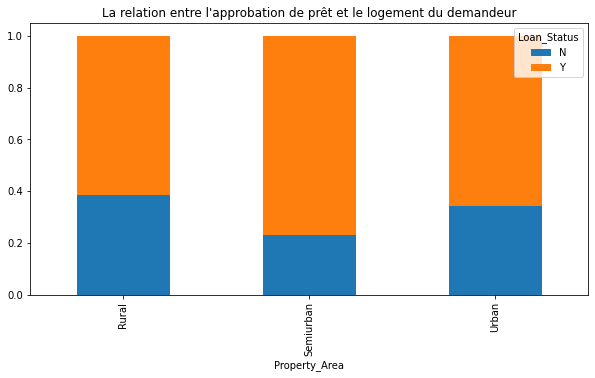

In [62]:
# Credit_History / Loan_Status
Credit_History=pd.crosstab(df['Credit_History'], df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5), title="La relation entre l'approbation de prêt et l'historique de crédit du demandeur") 
plt.show()

# Property_Area / Loan_Status
Property_Area=pd.crosstab(df['Property_Area'], df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5), title="La relation entre l'approbation de prêt et le logement du demandeur") 
plt.show()

**Relations entre les variables indépendantes et la variable cible :**

- Il n'y a pas vraiment de relation entre l'approbation du prêt et le genre du demandeur.
- Les personnes mariées sont les candidats les plus acceptés.
- Les demandeurs ayant 2 personnes à charges sont les plus acceptées.
- Il y'a pas vraiment de relation entre l'approbation de la demande de crédit et le fait qu'un demandeur est un travailleur indépendant ou non.
- Les demandes des personnes diplômées sont les plus approuvées.
- Les personnes ayant déjà des antécédents de crédits sont plus susceptibles d'obtenir une approbation de leurs demandes de crédit.
- Les demandes des personnes vivants en zone rurale sont les plus approuvées.

## **Prétraitement des données**

Pour cette étape nous allons réaliser les taches suivantes :

- Traiter les valeurs manquantes
- Encoder les données
- Normaliser les données

In [63]:
# Création d'une copie du dataset
df1 = df.copy()

# Supprimer Loan_ID du dataset
df1.drop(['Loan_ID'], axis = 1, inplace = True)

### **Traiter les valeurs manquantes**

In [64]:
# Voir les valeurs manquantes
df1.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [65]:
# Remplaçer les valeurs manquantes par :

# Married ------------> mode
# Gender -------------> mode
# Dependents ---------> mode
# Self_Employed ------> mode
# Credit_History -----> mode
# LoanAmount ---------> médiane
# Loan_Amount_Term ---> médiane

def imputation(data):
    """
    Permet de traiter et de remplaçer les valeurs manquantes de chaque variable d'un dataframe
    
    data: un dataframe
    """
    data["Married"].fillna(data["Married"].mode()[0], inplace=True)
    data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)
    data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)
    data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)
    data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
    data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

imputation(df1)

In [66]:
# Nombre de valeurs manquantes après le traitement
df1.isna().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

### **Encoder les données**

In [67]:
# Encodage des données avec la fonction get_dummies()

def encodage(data):
    """
    Fonction qui permet d'encoder les données d'un dataframe
    
    data: un dataframe
    """
    
    return pd.get_dummies(data, drop_first=True)

df1 = encodage(df1)
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


### **Normaliser les données**

In [68]:
# D'abord, on sépare la variable target des features 
y = df1['Loan_Status_Y']
X = df1.drop('Loan_Status_Y', axis = 1)

In [69]:
from sklearn.preprocessing import StandardScaler

#  Normalisation des données
X = StandardScaler().fit(X).transform(X)

## **Modélisation**

In [70]:
# Importation des packages pour la modélisation
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

### **Partitionnement des données**

- **80%** : Données d'entrainement

- **20%** : Données de test

In [71]:
# Découper les données en données d'entrainement et de test avec la fonction train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [72]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print('-'*35)
print("X_test  : ", X_test.shape)
print("y_test  : ", y_test.shape)

X_train :  (491, 14)
y_train :  (491,)
-----------------------------------
X_test  :  (123, 14)
y_test  :  (123,)


### **Procédure d'évaluation**

In [73]:
# Scores va contenir les différents scores obtenus par les nos modèles
scores = {}

In [74]:
def evaluation(model, name_in_scores):
    """
    Fonction qui permet d'évaluer un modèle
    
    model: un modèle d'apprentissage automatique
    name_in_scores: le nom du modèle dans le dictionnaire scores
    """
    print('')
    print('')
    print(model)
    print('')
    print('')
    print('-'*60)
    print('')
    
    # Voir si notre modèle est en overfitting ou en underfitting
    print("Learning Curves")
    print('')
    N, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train, 
                                               scoring = 'accuracy',
                                               train_sizes= np.linspace(0.1, 1.0, 5),
                                               cv = 5
                                               )

    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    print('-'*60)
    print('')
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # La matrice de confusion
    print("La matrice de confusion")
    print('')
    
    # Calcul de la matrice de confusion
    cf_matrix = confusion_matrix(y_test, y_pred_test)
    
    # Visualiser la matrice
    sns.heatmap(cf_matrix, 
                annot=True,
                xticklabels = ['False','True'],
                yticklabels = ['False','True'])
    plt.xlabel("Classes Prédites")
    plt.ylabel("Classes Réelles")
    plt.show()
    
    print('-'*60)
    print('')
    
    # Le rapport de classification
    print("Le rapport de classification")
    print('')
    print(classification_report(y_test, y_pred_test))
    print('-'*60)
    print('')
    

    
    print("Train set accuracy score: ", accuracy_score(y_train, y_pred_train))
    print("Train set f1 score: ", f1_score(y_train, y_pred_train))
    print("Test set accuracy score: ", accuracy_score(y_test, y_pred_test))
    print("Test set f1 score: ", f1_score(y_test, y_pred_test))
    print('')
    print('')
    print('-'*60)
    print('')
    print('')

    scores[name_in_scores] = [
        np.around(accuracy_score(y_test, y_pred_test), 4) * 100,
        np.around(precision_score(y_test, y_pred_test), 4) * 100,
        np.around(recall_score(y_test, y_pred_test), 4) * 100,
        np.around(f1_score(y_test, y_pred_test), 4) * 100
    ]

## **Implémentation des modèles**

### **K-Nearest Neighbors**



KNeighborsClassifier(metric='euclidean', n_neighbors=9)


------------------------------------------------------------

Learning Curves



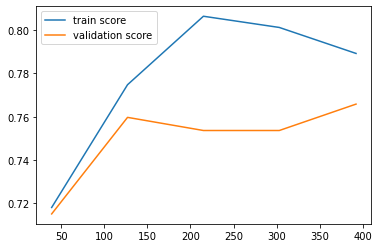

------------------------------------------------------------

La matrice de confusion



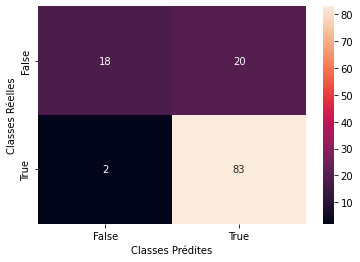

------------------------------------------------------------

Le rapport de classification

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123

------------------------------------------------------------

Train set accuracy score:  0.7881873727087576
Train set f1 score:  0.8635170603674541
Test set accuracy score:  0.8211382113821138
Test set f1 score:  0.8829787234042553


------------------------------------------------------------




In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_hyp = {
    'n_neighbors': np.arange(1, 10),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

knn_grid = GridSearchCV(knn, knn_hyp, scoring = "accuracy", cv = 5)

knn_grid.fit(X_train, y_train)

knn_model = knn_grid.best_estimator_

evaluation(knn_model, "K-Nearest Neighbors")

### **Random Forest**



RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)


------------------------------------------------------------

Learning Curves



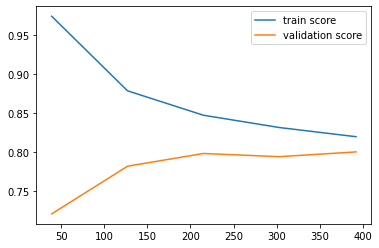

------------------------------------------------------------

La matrice de confusion



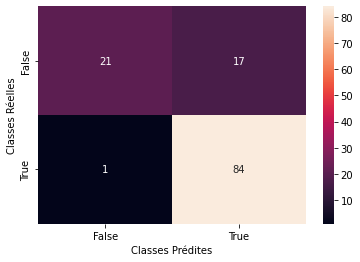

------------------------------------------------------------

Le rapport de classification

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

------------------------------------------------------------

Train set accuracy score:  0.814663951120163
Train set f1 score:  0.8804204993429698
Test set accuracy score:  0.8536585365853658
Test set f1 score:  0.903225806451613


------------------------------------------------------------




In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

rf_hyp = {
    'n_estimators':[5, 10, 20, 50, 100, 200],
    'max_depth':[None, 2, 5, 10, 15, 20]
}

rf_grid = GridSearchCV(rf, rf_hyp, scoring = "accuracy", cv = 5)

rf_grid.fit(X_train, y_train)

rf_model = rf_grid.best_estimator_

evaluation(rf_model, "Random Forest")

### **Logistic Regression**



LogisticRegression(C=0.1, random_state=42)


------------------------------------------------------------

Learning Curves



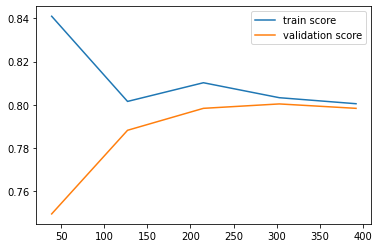

------------------------------------------------------------

La matrice de confusion



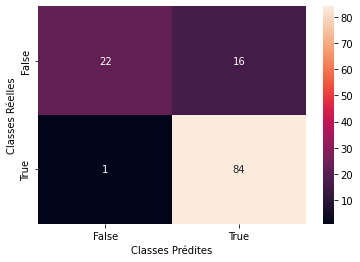

------------------------------------------------------------

Le rapport de classification

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

------------------------------------------------------------

Train set accuracy score:  0.8004073319755601
Train set f1 score:  0.8710526315789474
Test set accuracy score:  0.8617886178861789
Test set f1 score:  0.9081081081081082


------------------------------------------------------------




In [77]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state = 42)

lr_hyp = {
    'C':[0.001, 0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(lr, lr_hyp, scoring = "accuracy", cv = 5)

lr_grid.fit(X_train, y_train)

lr_model = lr_grid.best_estimator_

evaluation(lr_model, "Logistic Regression")

## **Résultats**

In [78]:
df_scores = pd.DataFrame(scores.values(), index=scores.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_scores

,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors,82.11,80.58,97.65,88.30
Random Forest,85.37,83.17,98.82,90.32
Logistic Regression,86.18,84.00,98.82,90.81


## **Conclusion**

La comparaison des résultats nous amène à dire que le modèle 3 utilisant la régression logistique donne de meilleures estimations comparant aux deux autres modèles. En somme, on déduit que ce modèle peut fournir une approche rapide et fiable dans la prise de décision qui peut être une alternative aux procédures actuelles adoptées par les banques pour traiter l'approbation de prêt d'un demandeur.